In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud

sns.set_theme(style="darkgrid")

## Load Data

In [7]:
df = pd.read_pickle('data/preprocessed_data.pkl')

# rename 'moderna' to 'Moderna'
df['vaccine'] = df['vaccine'].replace('moderna', 'Moderna')

# remove neutral tweets
df = df[df['sentiment'] != 'Neutral']

## EDA

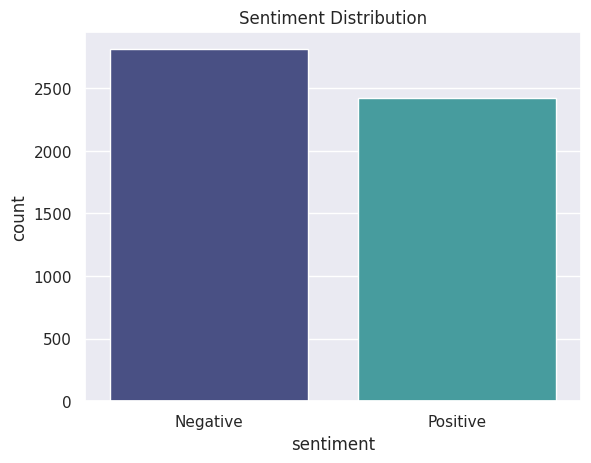

In [8]:
# plot the distribution of the sentiments
sns.countplot(df, x='sentiment', palette='mako')
plt.title('Sentiment Distribution');

Text(45.75673652694611, 0.5, 'Proportion')

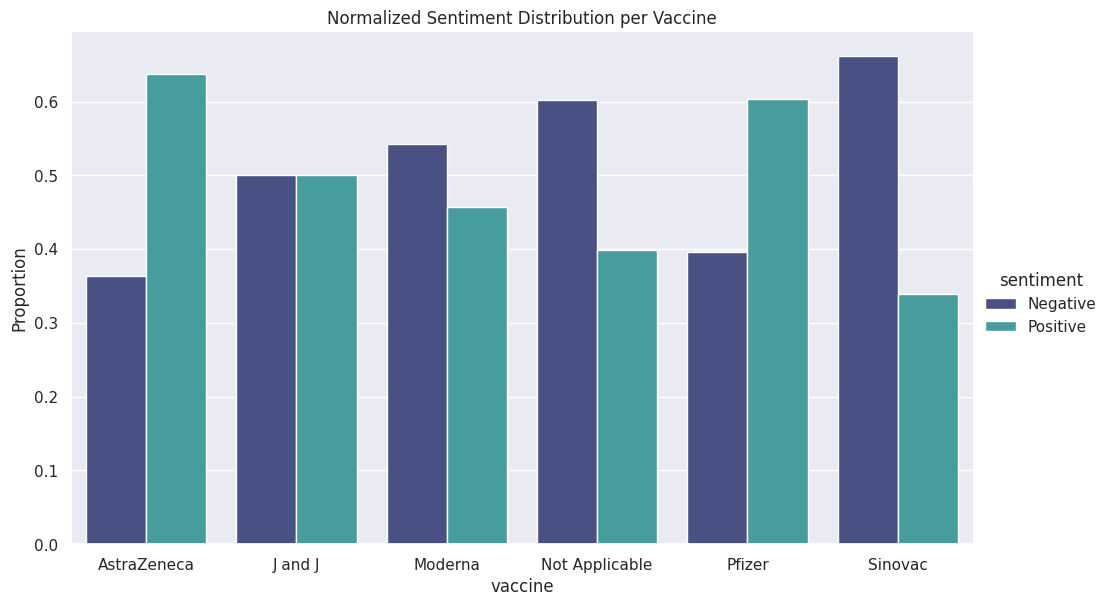

In [27]:
# compute proportions
prop_df = df.groupby(['vaccine', 'sentiment']).size().reset_index(name='counts')
total_counts = df.groupby('vaccine').size().reset_index(name='total_counts')
prop_df = prop_df.merge(total_counts, on='vaccine')
prop_df['proportions'] = prop_df['counts'] / prop_df['total_counts']
# # Plot the sentiment distribution per vaccines

sns.catplot(data=prop_df, x='vaccine', y='proportions', hue='sentiment', kind='bar', palette='mako',  height=6, aspect=1.67)
plt.title('Normalized Sentiment Distribution per Vaccine')
plt.ylabel('Proportion')

In [26]:
prop_df

vaccine sentiment  counts  total_counts  proportions
0      AstraZeneca  Negative     227           625     0.363200
1      AstraZeneca  Positive     398           625     0.636800
2          J and J  Negative      14            28     0.500000
3          J and J  Positive      14            28     0.500000
4          Moderna  Negative     340           627     0.542265
5          Moderna  Positive     287           627     0.457735
6   Not Applicable  Negative     302           502     0.601594
7   Not Applicable  Positive     200           502     0.398406
8           Pfizer  Negative     529          1336     0.395958
9           Pfizer  Positive     807          1336     0.604042
10         Sinovac  Negative    1400          2117     0.661313
11         Sinovac  Positive     717          2117     0.338687

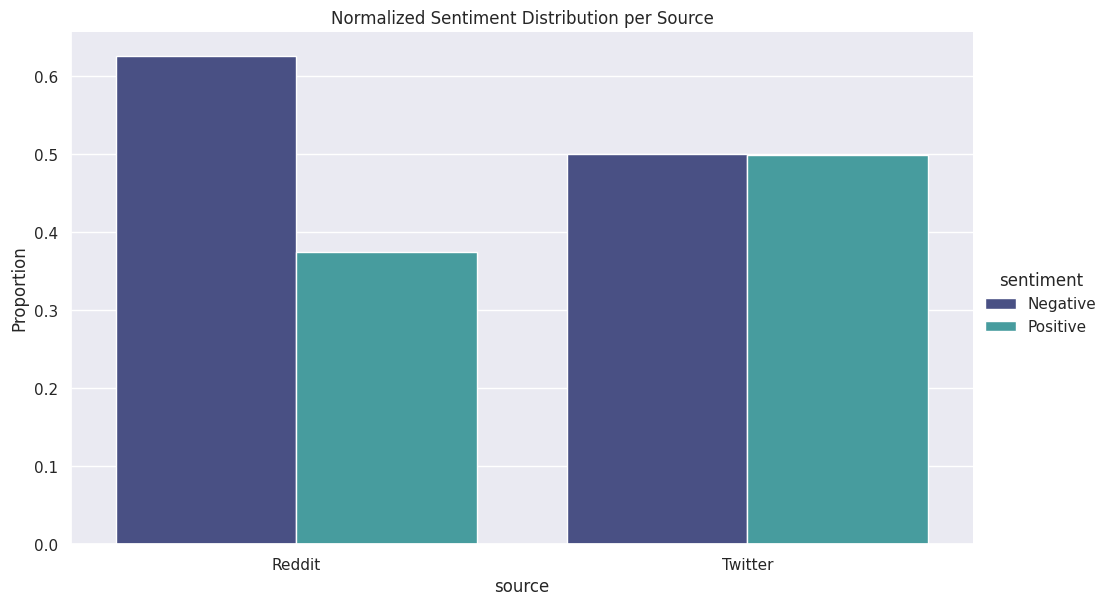

In [30]:
# compute proportions
prop_df = df.groupby(['source', 'sentiment']).size().reset_index(name='counts')
total_counts = df.groupby('source').size().reset_index(name='total_counts')
prop_df = prop_df.merge(total_counts, on='source')
prop_df['proportions'] = prop_df['counts'] / prop_df['total_counts']
# Plot the sentiment distribution per vaccines

sns.catplot(data=prop_df, x='source', y='proportions', hue='sentiment', kind='bar', palette='mako',  height=6, aspect=1.67)
plt.title('Normalized Sentiment Distribution per Source')
plt.ylabel('Proportion')
plt.show()

In [31]:
prop_df

source sentiment  counts  total_counts  proportions
0   Reddit  Negative     952          1522     0.625493
1   Reddit  Positive     570          1522     0.374507
2  Twitter  Negative    1860          3713     0.500943
3  Twitter  Positive    1853          3713     0.499057

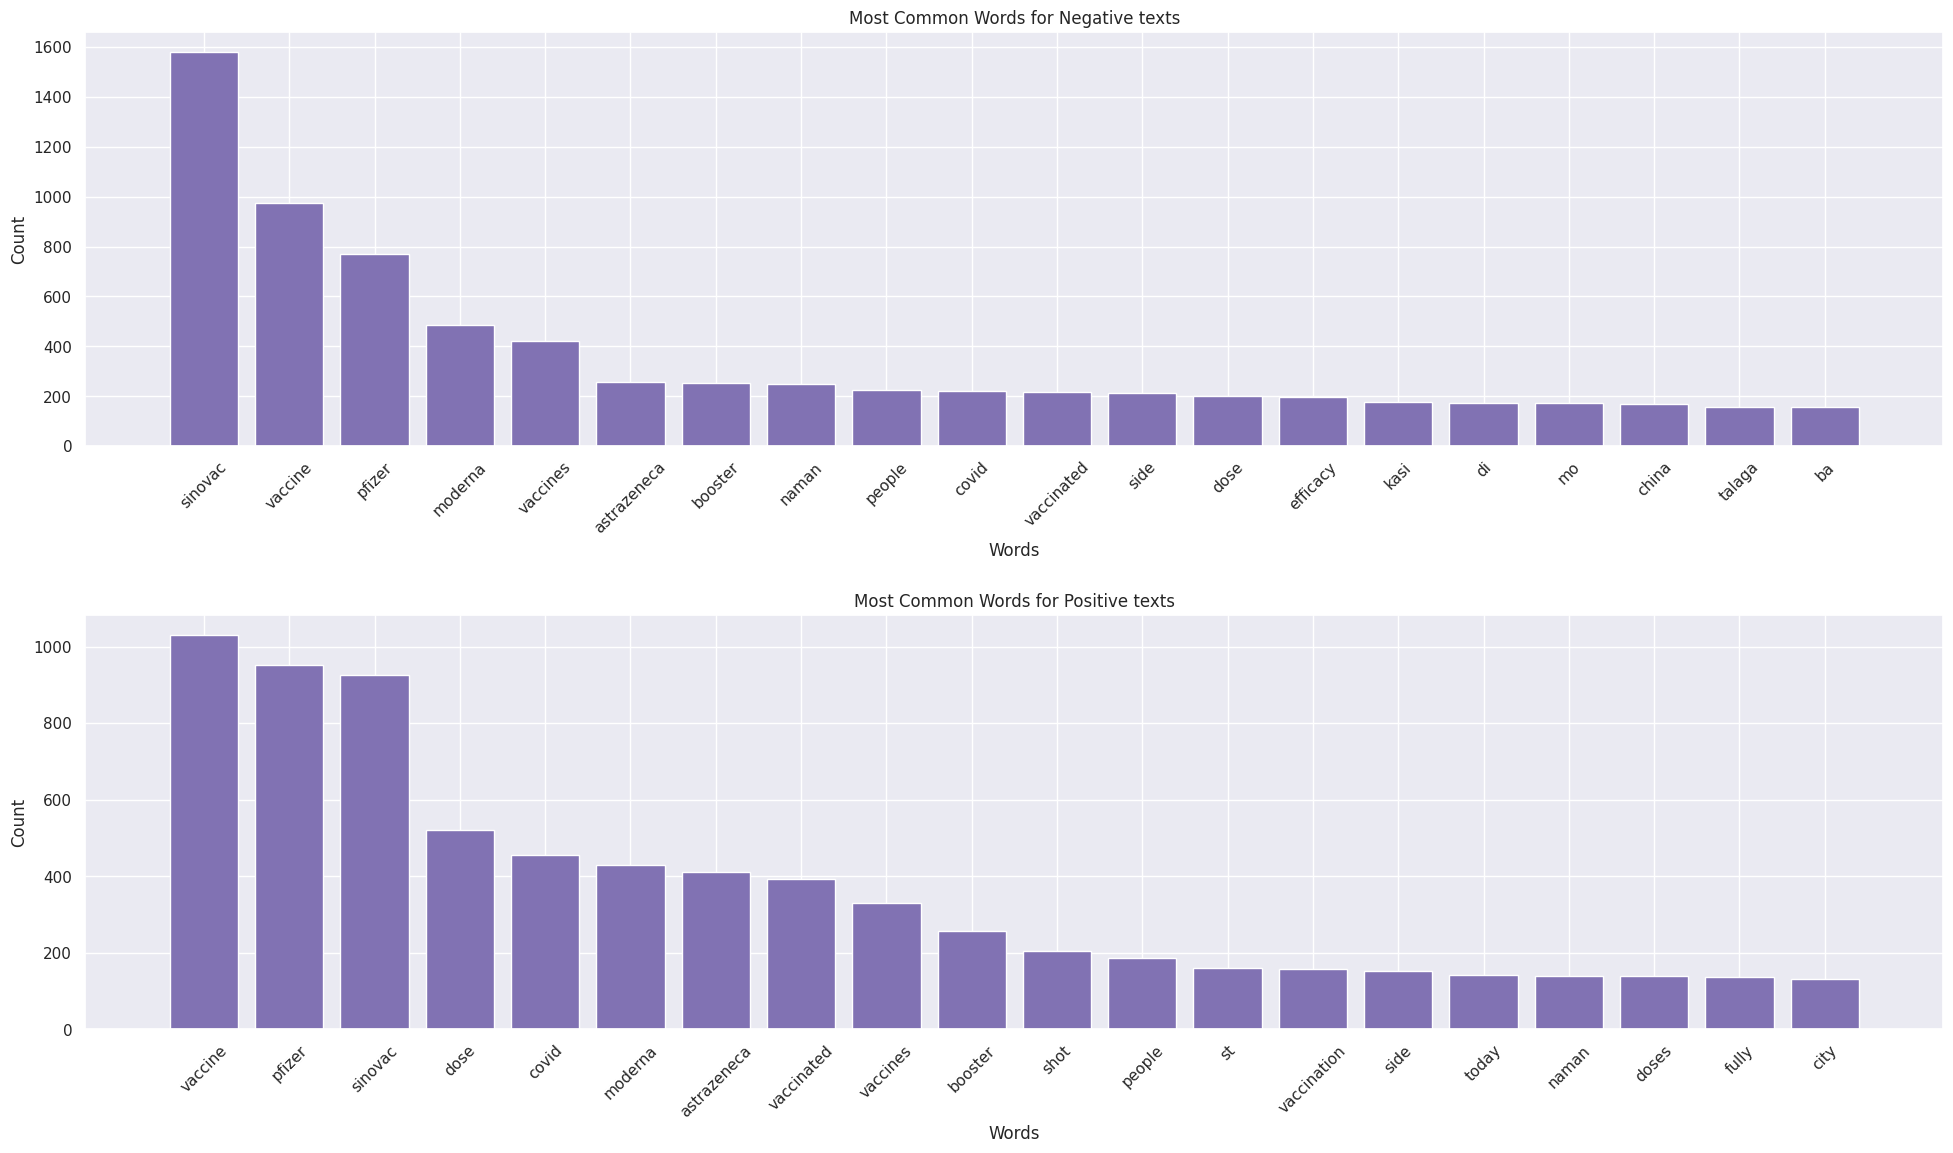

In [32]:
# Compute most common words per sentiment

from collections import Counter

def get_most_common_words(df, sentiment, n=10):
    words = []
    for tweet in df[df['sentiment'] == sentiment]['no_stopwords_tweet']:
        words.extend(tweet)
    return Counter(words).most_common(n)

# get most common words per sentiment
most_common_words = {}
for sentiment in df['sentiment'].unique():
    most_common_words[sentiment] = get_most_common_words(df, sentiment, 20)

# plot most common words per sentiment
fig, axes = plt.subplots(2, 1, figsize=(20, 12))
axes = axes.flatten()
for i, sentiment in enumerate(df['sentiment'].unique()):
    axes[i].bar(*zip(*most_common_words[sentiment]), color='m')
    axes[i].set_title(f'Most Common Words for {sentiment} texts')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Words')
    axes[i].tick_params(axis='x', labelrotation=45)

# create a gap between the subplots
fig.tight_layout(pad=2.0)

### WordCloud

In [33]:
# Create a word cloud for each sentiment

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


def create_wordcloud(df, sentiment, vaccine=None):

    # TF-IDF
    vectorizer = TfidfVectorizer()
    if vaccine is not None:
        text = df[(df['sentiment'] == sentiment) & (df['vaccine'] == vaccine)]['text']
    else:
        text = df[df['sentiment'] == sentiment]['text']
    
    X = vectorizer.fit_transform(text)
    feature_names = vectorizer.get_feature_names_out()

    # get tfidf scores
    tfidf_scores = X.toarray().sum(axis=0)

    # create a dictionary of words and tfidf scores
    tfidf_dict = dict(zip(feature_names, tfidf_scores))

    # create a wordcloud
    wc = WordCloud(background_color='white', width=3000, height=2000, max_words=100)

    # generate word cloud
    wc.generate_from_frequencies(tfidf_dict)

    # show
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {vaccine} {sentiment} Text')
    plt.show()

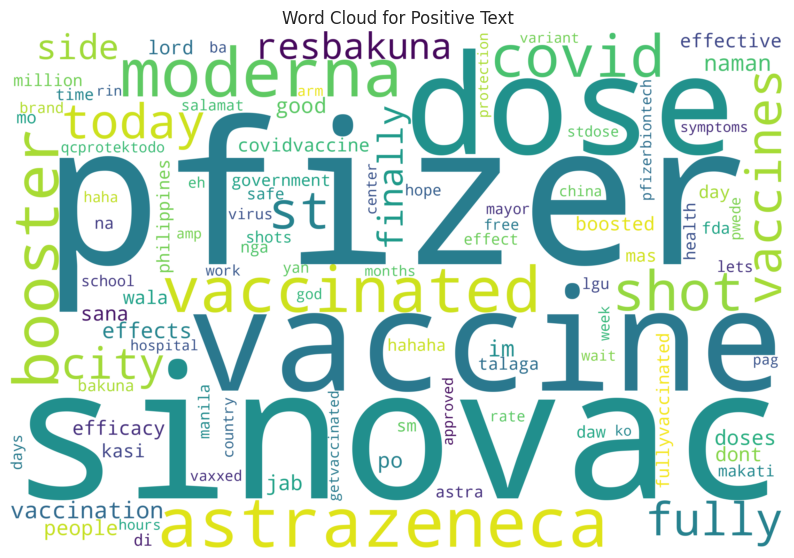

In [34]:
create_wordcloud(df, 'Positive')

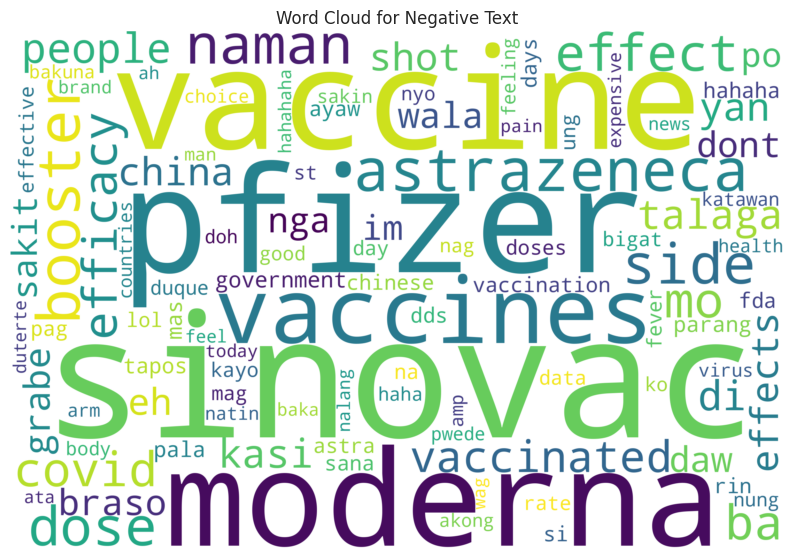

In [35]:
create_wordcloud(df, 'Negative')

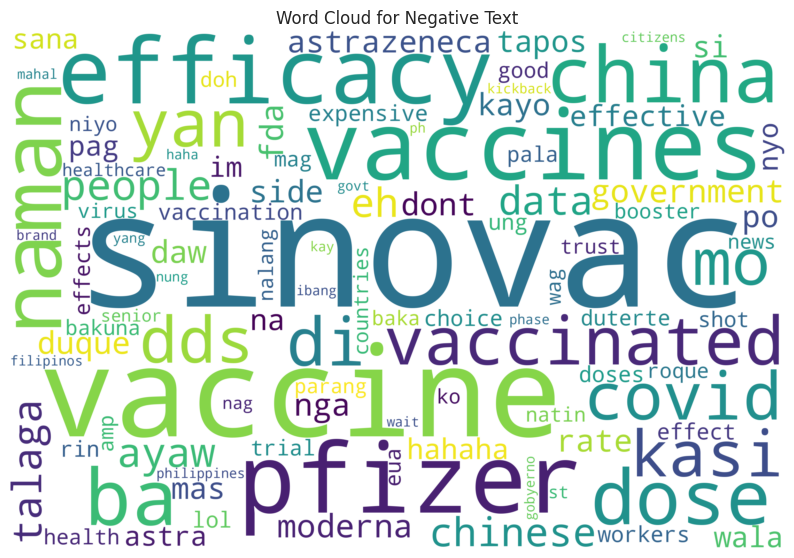

In [36]:
create_wordcloud(df, 'Negative', 'Sinovac')

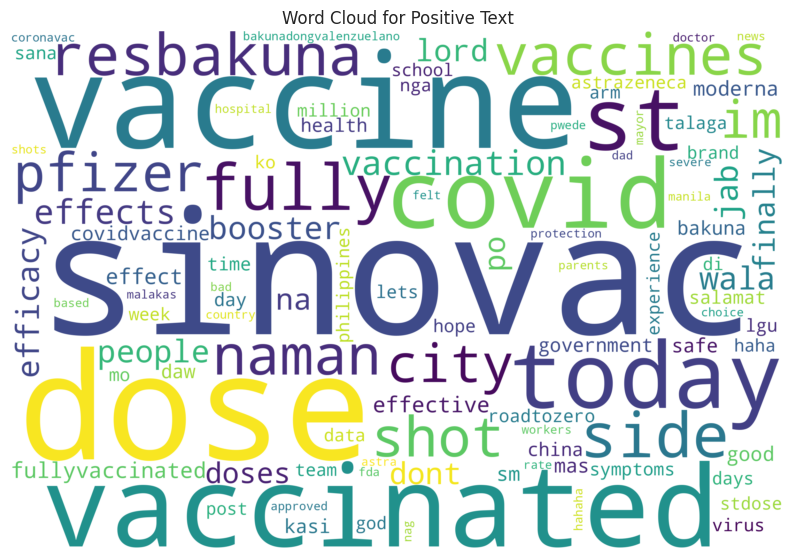

In [37]:
create_wordcloud(df, 'Positive', 'Sinovac')

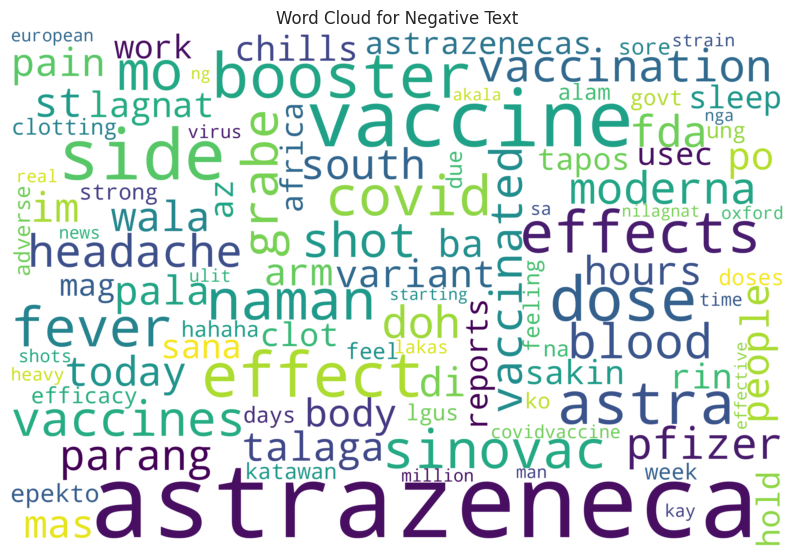

In [38]:
create_wordcloud(df, 'Negative', 'AstraZeneca')

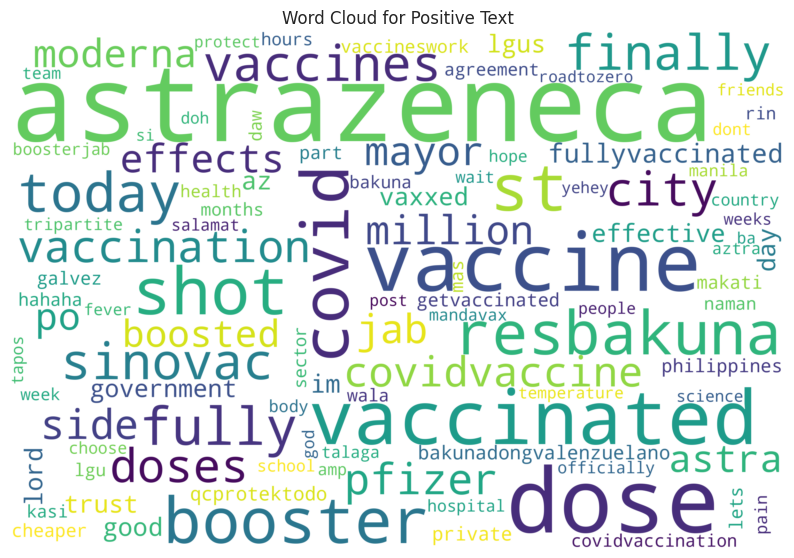

In [39]:
create_wordcloud(df, 'Positive', 'AstraZeneca')

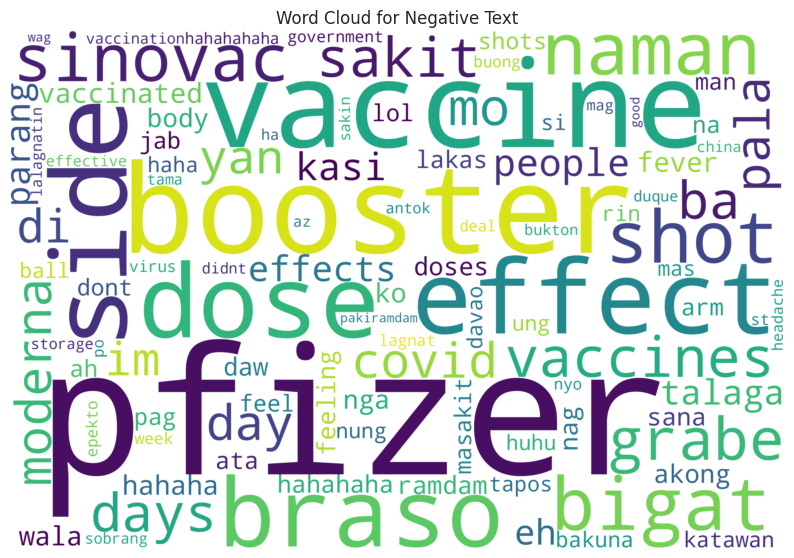

In [40]:
create_wordcloud(df, 'Negative', 'Pfizer')

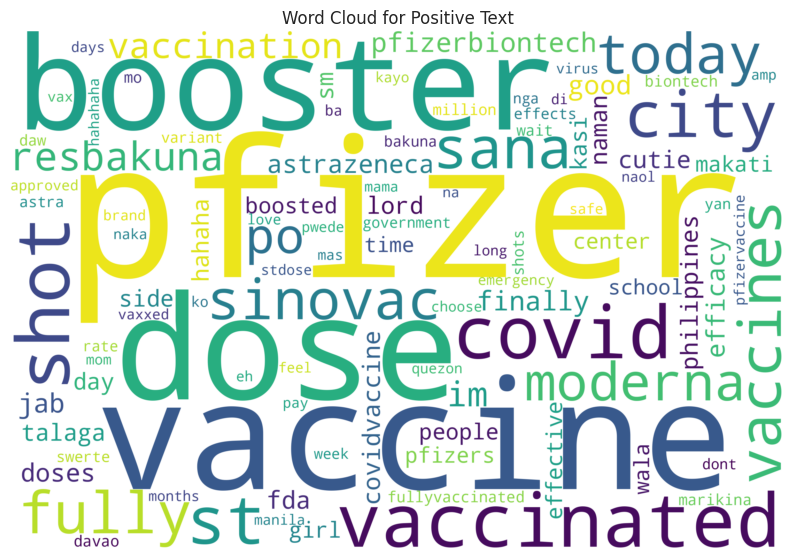

In [41]:
create_wordcloud(df, 'Positive', 'Pfizer')

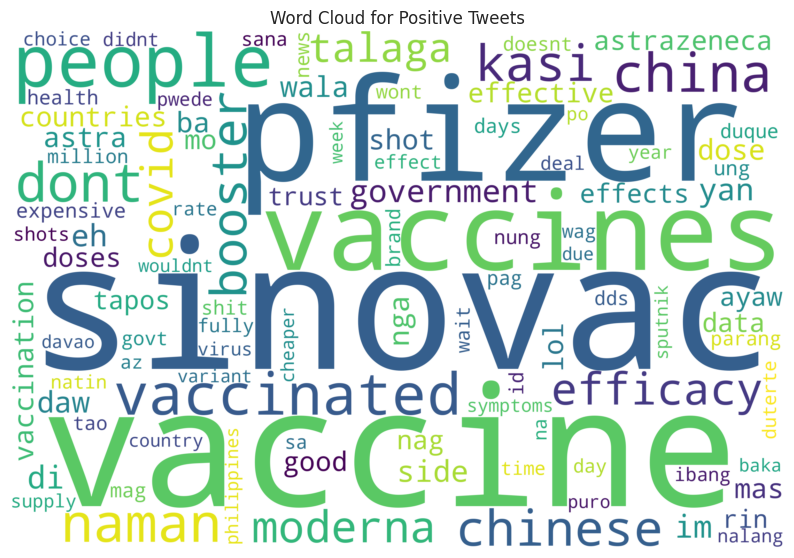

In [42]:
# TF-IDF
vectorizer = TfidfVectorizer()
text = df[(df['sentiment'] == 'Negative') & (df['source'] == 'Reddit')]['text']
X = vectorizer.fit_transform(text)
feature_names = vectorizer.get_feature_names_out()

# get tfidf scores
tfidf_scores = X.toarray().sum(axis=0)

# create a dictionary of words and tfidf scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# create a wordcloud
wc = WordCloud(background_color='white', width=3000, height=2000, max_words=100)

# generate word cloud
wc.generate_from_frequencies(tfidf_dict)

# show
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Negative Reddit Comments')
plt.show()

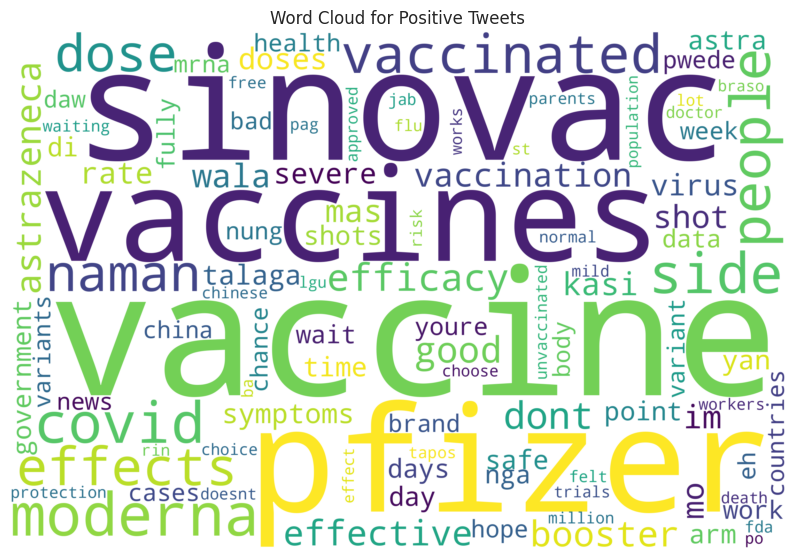

In [43]:
# TF-IDF
vectorizer = TfidfVectorizer()
text = df[(df['sentiment'] == 'Positive') & (df['source'] == 'Reddit')]['text']
X = vectorizer.fit_transform(text)
feature_names = vectorizer.get_feature_names_out()

# get tfidf scores
tfidf_scores = X.toarray().sum(axis=0)

# create a dictionary of words and tfidf scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# create a wordcloud
wc = WordCloud(background_color='white', width=3000, height=2000, max_words=100)

# generate word cloud
wc.generate_from_frequencies(tfidf_dict)

# show
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Negative Reddit Comments')
plt.show()

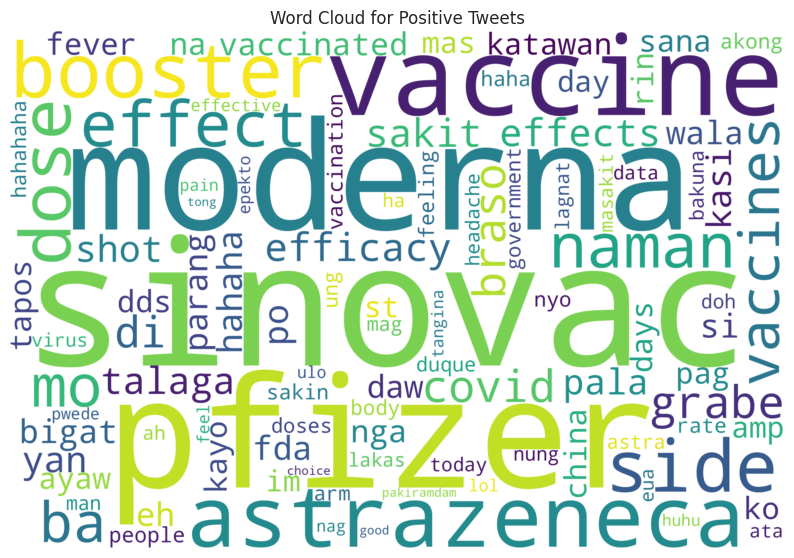

In [44]:
# TF-IDF
vectorizer = TfidfVectorizer()
text = df[(df['sentiment'] == 'Negative') & (df['source'] == 'Twitter')]['text']
X = vectorizer.fit_transform(text)
feature_names = vectorizer.get_feature_names_out()

# get tfidf scores
tfidf_scores = X.toarray().sum(axis=0)

# create a dictionary of words and tfidf scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# create a wordcloud
wc = WordCloud(background_color='white', width=3000, height=2000, max_words=100)

# generate word cloud
wc.generate_from_frequencies(tfidf_dict)

# show
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Negative Tweets')
plt.show()

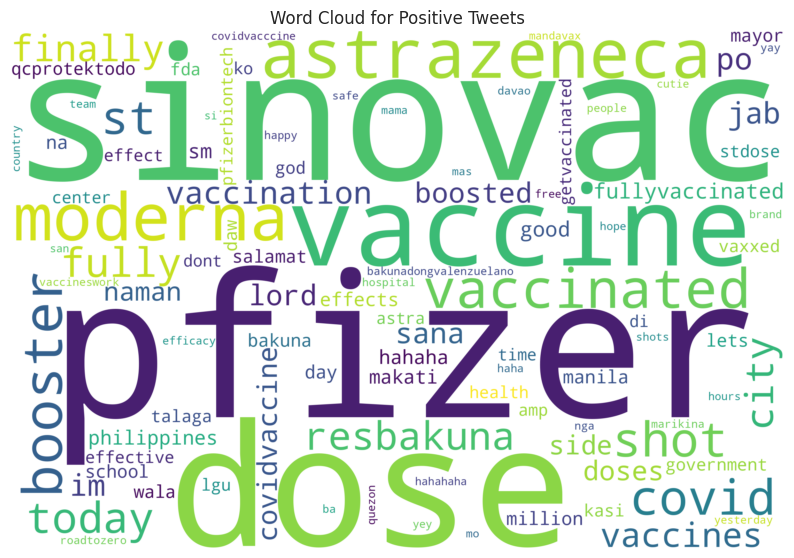

In [45]:
# TF-IDF
vectorizer = TfidfVectorizer()
text = df[(df['sentiment'] == 'Positive') & (df['source'] == 'Twitter')]['text']
X = vectorizer.fit_transform(text)
feature_names = vectorizer.get_feature_names_out()

# get tfidf scores
tfidf_scores = X.toarray().sum(axis=0)

# create a dictionary of words and tfidf scores
tfidf_dict = dict(zip(feature_names, tfidf_scores))

# create a wordcloud
wc = WordCloud(background_color='white', width=3000, height=2000, max_words=100)

# generate word cloud
wc.generate_from_frequencies(tfidf_dict)

# show
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {sentiment} Tweets')
plt.show()

### Sentiment Trends

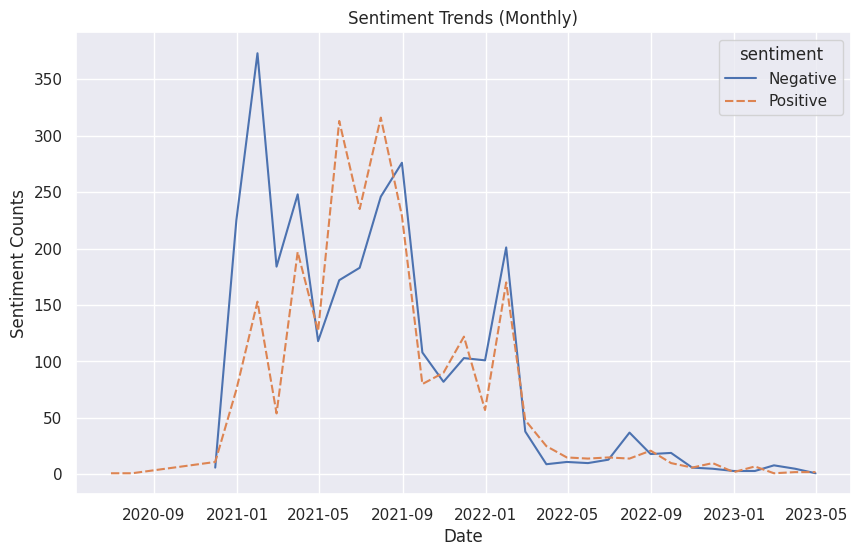

In [46]:
df.date = pd.to_datetime(df.date)

# Group the data by month and sentiment
df_monthly = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment'])['sentiment'].count().reset_index(name='count')

# Pivot the data to create separate columns for Positive and Negative counts
df_monthly = df_monthly.pivot(index='date', columns='sentiment', values='count').reset_index()

# Set the date column as the index of the DataFrame
df_monthly.set_index('date', inplace=True)

# Create a time series plot for Positive and Negative counts
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly)
plt.title('Sentiment Trends (Monthly)')
plt.xlabel('Date')
plt.ylabel('Sentiment Counts')
plt.show()

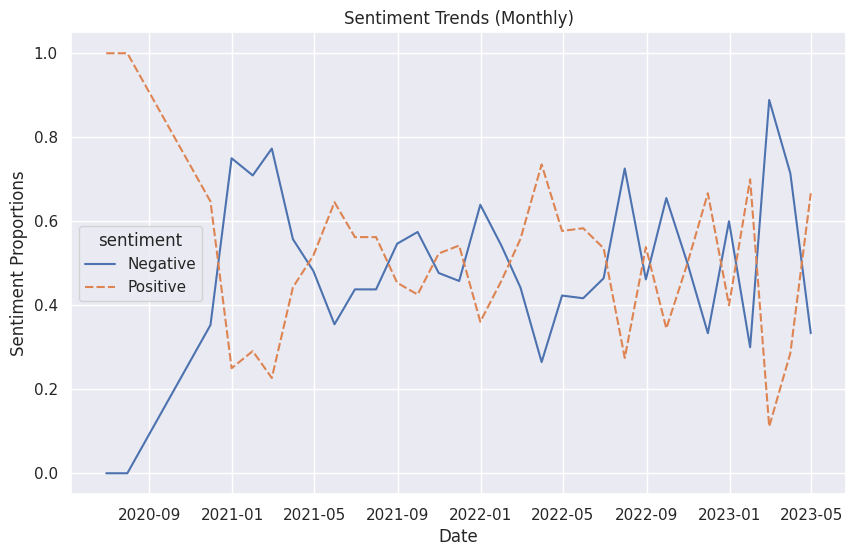

In [48]:
# Resample the data to monthly frequency and group by sentiment
df_monthly = df.resample('M', on='date').sentiment.value_counts().unstack(fill_value=0)

# Calculate the total count for each month
df_monthly['total'] = df_monthly.sum(axis=1)

# Divide each count by the total count for that month to get proportions
df_monthly['Positive'] = df_monthly['Positive'] / df_monthly['total']
df_monthly['Negative'] = df_monthly['Negative'] / df_monthly['total']

# Drop the total column
df_monthly.drop('total', axis=1, inplace=True)

# Create a time series plot for Positive and Negative counts
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly)
plt.title('Sentiment Trends (Monthly)')
plt.xlabel('Date')
plt.ylabel('Sentiment Proportions')
plt.show()